In [93]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

In [77]:
def plot_auc(figure_name,titlename,y,pred):
    fpr, tpr, thresholds = metrics.roc_curve(y, pred, pos_label=1)


    print("compute area:",metrics.auc(fpr, tpr))
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % metrics.auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(titlename)
    plt.legend(loc="lower right")
    plt.savefig('../../figures'+figure_name+'.jpg')
    plt.show()


In [159]:
# get the distribution of tss location in genecodetss
#tssLocations = open('/Users/wangshili/Desktop/2021_spring/genomics/project/02710-group-project/data/ABC/GENCODEv19-TSSs.bed')
tss_filterd=open('/Users/wangshili/Desktop/2021_spring/genomics/project/02710-group-project/data/ABC/k562_tss_filterd.txt')
    
# get the distribution of all predictions
predictions = open('/Users/wangshili/Desktop/2021_spring/genomics/project/02710-group-project/data/ABC/K562.GeneSummary.txt')

all_preds = open('/Users/wangshili/Desktop/2021_spring/genomics/project/02710-group-project/data/ABC/K562.AllPredictions.txt')


In [160]:
tss = []

for line in tss_filterd.readlines():
#for line in tssLocations.readlines()[1:]:
    line=line.rstrip().split("\t")
    #location = int(line[1])
    location = int(line[0])
    tss.append(location)
print(len(tss))

20407


In [161]:
pred = []

for line in predictions.readlines()[1:]:
    #print(line)
    line=line.rstrip().split("\t")
    location = float(line[2])
    pred.append(location)
   
    #print(location)
    #break
print(len(pred))

24578


In [131]:
def plot_hist(data,name):
    # An "interface" to matplotlib.axes.Axes.hist() method
    n, bins, patches = plt.hist(x=data, bins='auto', color='#0504aa',
                                alpha=0.7, rwidth=0.85)
    plt.grid(axis='y', alpha=0.75)
    plt.xlabel('location')
    plt.ylabel('Frequency')
    plt.title(name)
    plt.text(23, 45, r'$\mu=15, b=3$')
    maxfreq = n.max()
    # Set a clean upper y-axis limit.
    plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

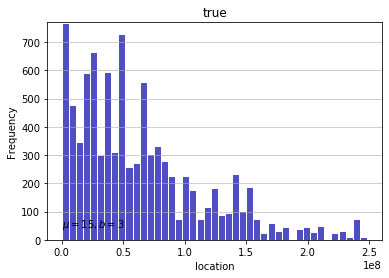

In [117]:
plot_hist(tss,'true')

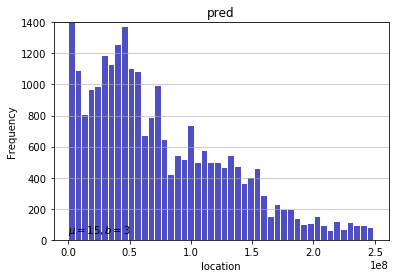

In [118]:
plot_hist(pred,'pred')

In [119]:
print(len(list(set(pred).intersection(tss))))

222


In [162]:
keys = list(set(pred).intersection(tss))

In [163]:
predictions = open('/Users/wangshili/Desktop/2021_spring/genomics/project/02710-group-project/data/ABC/K562.GeneSummary.txt')

dict = {}
# generate the name,location pair
for line in predictions.readlines()[1:]:
    line=line.rstrip().split("\t")
    location = float(line[2])
    if location in keys:
        name = line[1]
        #print(name)
        #break
        dict[name] = location
    pred.append(location)

In [6]:
print(len(keys))

6129


In [62]:
print(len(dict))

6184


In [32]:
dict.get('LOC100288069')
print(list(dict.keys())[:2])

['FAM138A', 'FAM138F']


In [164]:
all_preds = open('/Users/wangshili/Desktop/2021_spring/genomics/project/02710-group-project/data/ABC/K562.AllPredictions.txt')

abc_results = '/Users/wangshili/Desktop/2021_spring/genomics/project/02710-group-project/data/ABC/predict_filtered_output.txt'
output=open(abc_results, "w+")
for line in all_preds.readlines()[1:]:
    line=line.rstrip().split("\t")
    # start,end,tsslocation,abc_score
    name = line[3]
    if line[3] in dict.keys():
#         print(line[3])
#         print(dict[line[3]])
#         print(str(line[1]))
#         print(str(line[2]))
#         print(str(line[1])+"\t"+str(line[2])+"\t"+str(dict[line[3]])+"\t"+str(line[6]))
#         break
        #print(line[1]+"\t"+line[2]+"\t"+dict[line[3]]+"\t"+dict[6],file=output)
         print(str(line[1])+"\t"+str(line[2])+"\t"+str(dict[line[3]])+"\t"+str(line[6]),file=output)
output.close()
all_preds.close()

In [135]:
def Create_TSS_Dict(tss):
    tss=open(tss)
    tssDict={}
    for line in tss:
        line=line.rstrip().split("\t")
        if line[6] in tssDict:
            tssDict[line[6]].append(int(line[1]))
        else:
            tssDict[line[6]]=[int(line[1])]
    tss.close()
    return tssDict

def Create_Enhancer_Dict(enhancers):
    enhancers=open(enhancers)
    enhancerDict={}
    for line in enhancers:
        line=line.rstrip().split("\t")
        enhancerDict[line[4]]=[int(line[1]),int(line[2])]
    enhancers.close()
    return enhancerDict


In [165]:
#analyze enhancer distribution
#enhancers_name ='/Users/wangshili/Desktop/2021_spring/genomics/project/02710-group-project/data/ABC/hg19-cCREs.bed'
#tss_name='/Users/wangshili/Desktop/2021_spring/genomics/project/02710-group-project/data/ABC/GENCODEv19-TSSs.bed'
tss_name_filterd='/Users/wangshili/Desktop/2021_spring/genomics/project/02710-group-project/data/ABC/k562_tss_filterd.txt'
enhancers_name_filterd='/Users/wangshili/Desktop/2021_spring/genomics/project/02710-group-project/data/ABC/k562_ccre_filterd.txt'

In [166]:
def Create_filtered_TSS_Dict(tss):
    tss=open(tss)
    tssDict={}
    for line in tss:
        line=line.rstrip().split("\t")
        if line[1] in tssDict:
            tssDict[line[1]].append(int(line[0]))
        else:
            tssDict[line[1]]=[int(line[0])]
    tss.close()
    return tssDict

def Create_filtered_Enhancer_Dict(enhancers):
    enhancers=open(enhancers)
    enhancerDict={}
    for line in enhancers:
        line=line.rstrip().split("\t")
        enhancerDict[line[2]]=[int(line[0]),int(line[1])]
    enhancers.close()
    return enhancerDict


In [167]:


# tssDict = Create_TSS_Dict(tss_name)
# enhancerDict = Create_Enhancer_Dict(enhancers_name)
tssFilteredDict = Create_filtered_TSS_Dict(tss_name_filterd)
enhancerFilteredDict = Create_filtered_Enhancer_Dict(enhancers_name_filterd)

In [168]:
#links = open('/Users/wangshili/Desktop/2021_spring/genomics/project/02710-group-project/data/ABC/K562.CRISPR-Benchmark.v3.txt')
benchmark_filterd=open('/Users/wangshili/Desktop/2021_spring/genomics/project/02710-group-project/data/ABC/'+
                                                   'k562_benchmark_filterd.txt')
#pairs=open('/Users/wangshili/Desktop/2021_spring/genomics/project/02710-group-project/data/ABC/ccreTsspairs.txt', "w+")
pairs=open('/Users/wangshili/Desktop/2021_spring/genomics/project/02710-group-project/data/ABC/ccreTsspairs_filtered.txt', "w+")

for line in benchmark_filterd:
# for line in links:
    line=line.rstrip().split("\t")
    
    #m=1000000000000
    for x in tssDict[line[1].rstrip()]:
        #start,end,tss_location,label
        if x in keys:
            print(str(enhancerDict[line[0].rstrip()][0])+"\t"+
              str(enhancerDict[line[0].rstrip()][1])+"\t"+
              str(x)+"\t"+str(line[2]),file=pairs)
#links.close()
benchmark_filterd.close()
pairs.close()

In [169]:
#final output score,label pair
# for enhancer within the 10000, considered as the same enhancer

#true_pairs=open('/Users/wangshili/Desktop/2021_spring/genomics/project/02710-group-project/data/ABC/ccreTsspairs.txt',"r")
true_pairs_filtered=open('/Users/wangshili/Desktop/2021_spring/genomics/project/02710-group-project/data/ABC/ccreTsspairs_filtered.txt',"r")


# tss_location, list of enhancer start position, end position, label
dict_true_pairs = {}

for line in true_pairs_filtered.readlines():
#for line in true_pairs.readlines():
    #print('hello')
    #print('line'+line)
    line=line.rstrip().split("\t")
    tss = int(line[2])
    row = []
    row.append(int(line[0]))
    row.append(int(line[1]))
    row.append(int(line[3]))
    
    try:
        #d[elem[1]].append(elem[0])
        dict_true_pairs[tss].append(row)
    except KeyError:
        dict_true_pairs[tss] = [row]
        #d[elem[1]] = [elem[0]]
    #break
#print(dict_true_pairs)
#for each line in abc_results, get the label from the dict and write the score and label to file
true_pairs_filtered.close()

In [170]:
print(len(dict_true_pairs.keys()))

451


In [62]:
print(list(dict_true_pairs.keys())[1:2])
#print(dict_true_pairs[762902])
print(dict_true_pairs[150947479])

[150947479]
[[150949554, 150950148, 1], [151568812, 151569555, 0], [150517853, 150518630, 0]]


In [171]:
# abc_results = open('/Users/wangshili/Desktop/2021_spring/genomics/project/02710-group-project/data/ABC/predict_output.txt')
# scoreLabelPairs = '/Users/wangshili/Desktop/2021_spring/genomics/project/02710-group-project/data/ABC/scoreLabelPairs.txt'

abc_results = open('/Users/wangshili/Desktop/2021_spring/genomics/project/02710-group-project/data/ABC/predict_filtered_output.txt')
scoreLabelPairs = '/Users/wangshili/Desktop/2021_spring/genomics/project/02710-group-project/data/ABC/scoreLabelPairs_filtered.txt'

output=open(scoreLabelPairs, "w+")
y = []
scores = []
for line in abc_results:
    #print(line)
    line=line.rstrip().split("\t")
    tss = int(float(line[2]))
    #print(tss)
    start = int(line[0])
    end = int(line[1])
    try:
        vals = dict_true_pairs[tss]
        for val in vals:
            reference_start = int(val[0]) - 10000
            reference_end = int(val[1]) + 10000
            if start > reference_start and end < reference_end:
                #label, score
                y.append(int(val[2]))
                scores.append(float(line[3]))
                print(int(val[2]),float(line[3]),file=output)
    except KeyError:
        continue
    #break    

abc_results.close()
output.close()

In [172]:
print(len(scores))
print(len(y))

20415
20415


compute area: 0.5320920446457205


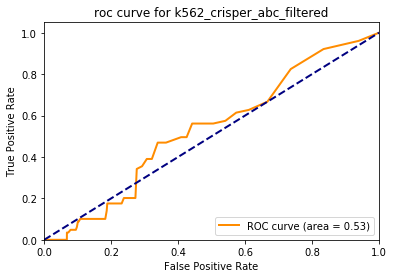

In [173]:
plot_auc('abc_auc_filtered','roc curve for k562_crisper_abc_filtered',y,scores)

In [85]:
def normal_mode(filename,tssDict,enhancerDict):
    y=[]
    pred=[] 
    distance = []
    links = open(filename)
    for line in links:
        line=line.rstrip().split("\t")
        m=1000000000000
        for x in tssDict[line[1].rstrip()]:
            a=min([abs(enhancerDict[line[0].rstrip()][0]-x),abs(enhancerDict[line[0].rstrip()][1]-x)])
            if a < m:
                m=a

        y.append(int(line[2]))
        if m == 0:
            pred.append(1)
            distance.append(1)
            #print(line[2]+"\t"+str(1),file=output)
        else:
            pred.append(1/float(m))
            distance.append(float(m))
            #print(line[2]+"\t"+str(1/float(m)),file=output)
    links.close()
    output.close()
    return np.array(y),np.array(pred),np.array(distance)

compute area: 0.8576811728450621


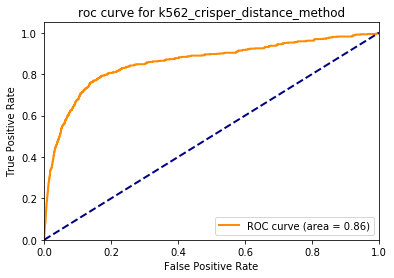

In [86]:
#analyze enhancer distribution
enhancers_name ='/Users/wangshili/Desktop/2021_spring/genomics/project/02710-group-project/data/ABC/hg19-cCREs.bed'
tss_name='/Users/wangshili/Desktop/2021_spring/genomics/project/02710-group-project/data/ABC/GENCODEv19-TSSs.bed'
linkname = '/Users/wangshili/Desktop/2021_spring/genomics/project/02710-group-project/data/ABC/K562.CRISPR-Benchmark.v3.txt'
tssDict = Create_TSS_Dict(tss_name)
enhancerDict = Create_Enhancer_Dict(enhancers_name)
y,pred,distance = normal_mode(linkname,tssDict,enhancerDict)
plot_auc('k562_distance','roc curve for k562_crisper_distance_method',y,pred)

25227
mean 322136.0405121497
std 197816.0985881557
median 316072.0


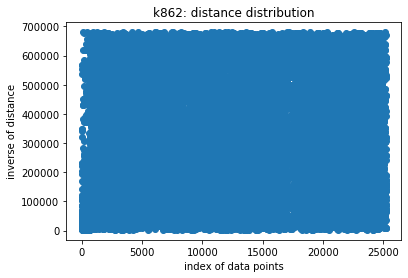

In [88]:
print(len(distance))
print('mean',np.mean(distance))
print('std',np.std(distance))
print('median',np.median(distance))
#rand_index = random.sample(range(1, 5155), 100)
#rand_x = np.arange(100)
#print(np.array(distance)[rand_index])
#plt.plot(rand_x, np.array(distance)[rand_index])
x = np.arange(len(distance))
#print('length of x',len(x))
plt.scatter(x, distance)
# #plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
# # plt.xlim([0.0, 1.0])
# # plt.ylim([0.0, 1.05])
plt.xlabel('index of data points')
plt.ylabel('inverse of distance')
plt.title('k862: distance distribution')
plt.savefig('k862: distance distance distribution.jpg')
plt.show()

In [156]:
def filtered_mode(filename,tssDict,enhancerDict):
    tss_filterd=open('/Users/wangshili/Desktop/2021_spring/genomics/project/02710-group-project/data/ABC/k562_tss_filterd.txt',"w+")
    ccre_filterd=open('/Users/wangshili/Desktop/2021_spring/genomics/project/02710-group-project/data/ABC/'+
                                      'k562_ccre_filterd.txt',"w+")
    benchmark_filterd=open('/Users/wangshili/Desktop/2021_spring/genomics/project/02710-group-project/data/ABC/'+
                                                   'k562_benchmark_filterd.txt',"w+")
    y=[]
    pred=[]  
    links=open(filename)
    for line in links:
        line=line.rstrip().split("\t")
        m=1000000000000
        for x in tssDict[line[1].rstrip()]:
            a=min([abs(enhancerDict[line[0].rstrip()][0]-x),abs(enhancerDict[line[0].rstrip()][1]-x)])
            if a < m:
                m=a
                
        if m == 0:
             continue
        else:
            if float(m) > 500000.0:
                y.append(int(line[2]))
                pred.append(1/float(m))

                #print(line[2]+"\t"+str(1/float(m)),file=output)

                for x in tssDict[line[1].rstrip()]:
                    print(str(x) +"\t"+line[1],file=tss_filterd)
                    print(str(enhancerDict[line[0].rstrip()][0])+"\t"+str(enhancerDict[line[0].rstrip()][1])+"\t"+str(line[0]),file=ccre_filterd)
                    print(line[0]+"\t"+line[1]+"\t"+line[2],file=benchmark_filterd)
    tss_filterd.close()
    ccre_filterd.close()
    benchmark_filterd.close()
    links.close()
    
    return np.array(y),np.array(pred)

compute area: 0.5118353541433771


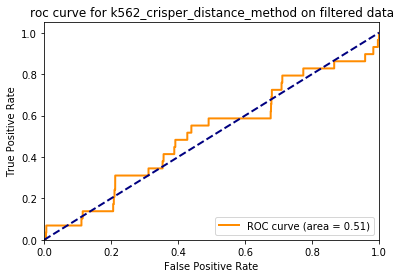

In [157]:
#analyze enhancer distribution
enhancers_name ='/Users/wangshili/Desktop/2021_spring/genomics/project/02710-group-project/data/ABC/hg19-cCREs.bed'
tss_name='/Users/wangshili/Desktop/2021_spring/genomics/project/02710-group-project/data/ABC/GENCODEv19-TSSs.bed'
linkname = '/Users/wangshili/Desktop/2021_spring/genomics/project/02710-group-project/data/ABC/K562.CRISPR-Benchmark.v3.txt'
tssDict = Create_TSS_Dict(tss_name)
enhancerDict = Create_Enhancer_Dict(enhancers_name)
y,pred = filtered_mode(linkname,tssDict,enhancerDict)
plot_auc('k562_distance_filtered','roc curve for k562_crisper_distance_method on filtered data',y,pred)

In [158]:
print(np.count_nonzero(y))

29
